# Startup Investments: Exploratory Data Analysis & Visualization

This notebook details the steps taken to conduct an exploratory analysis on a startups investment dataset provided by Kaggle. This analysis attempts to answer the following questions:

- Which companies are receiving the most investments?
- Which markets are receiving the most investments?
- Which funding round types receive the most investments?
- Which funding round codes receive the most investments?

In [40]:
#We first begin by importing the following libraries to conduct our analysis and create visualizations:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#We then read our CSV file to get a better picture of the data we are working with:

investments = pd.read_csv("investments.csv", encoding= 'unicode_escape')
investments

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,...,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/organization/andrewburnett-com-ltd,AndrewBurnett.com Ltd,|Internet|SEO|Services|Public Relations|Social...,Internet,GBR,NaN,Edinburgh,Edinburgh,/organization/ekaf,Ekaf,...,NaN,NaN,/funding-round/14fe2864e02d0f15ddc3ec8eacdc8e1b,seed,NaN,1/1/74,1974-01,1974-Q1,1974,NaN
1,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/antonio-murroni,ANTONIO MURRONI,...,NaN,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1/1/79,1979-01,1979-Q1,1979,"1,000,000"
2,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/filippo-murroni,FILIPPO Murroni,...,NaN,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1/1/79,1979-01,1979-Q1,1979,"1,000,000"
3,/organization/ikro,Ikro,NaN,NaN,BRA,NaN,BRA - Other,Canoas,/organization/crp-companhia-de-participacoes,CRP Companhia de Participac_esp,...,NaN,NaN,/funding-round/46c353a8249170cc4b6ab89a522fefdc,venture,A,6/1/82,1982-06,1982-Q2,1982,"724,000"
4,/organization/laborat-rios-noli,Laboratrios Noli,NaN,NaN,BRA,NaN,Porto Alegre,Porto Alegre,/organization/crp-companhia-de-participacoes,CRP Companhia de Participac_esp,...,NaN,NaN,/funding-round/5bdff09243b72f7fb325146259880e93,venture,A,12/1/82,1982-12,1982-Q4,1982,"155,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114500,/organization/helpling,Helpling,|Consumers|,Consumers,DEU,NaN,Berlin,Berlin,/person/lukasz-gadowski,Lukasz Gadowski,...,NaN,NaN,/funding-round/681af1b330a13043b17aeac45d841b88,venture,A,12/2/14,2014-12,2014-Q4,2014,"17,000,000"
114501,/organization/appknox,Appknox,|Mobile Security|SaaS|Mobile|,Mobile Security,SGP,NaN,Singapore,Singapore,/person/rajan-anandan,Rajan Anandan,...,NaN,NaN,/funding-round/bfb0b5859be2431f35882bc03370dd67,venture,NaN,12/2/14,2014-12,2014-Q4,2014,NaN
114502,/organization/strap,Strap,|Apps|,Apps,USA,OH,Cincinnati,Cincinnati,/person/trevor-wright,Trevor Wright,...,NaN,NaN,/funding-round/375e6c61fec5b3854ecbe5732dfdcabe,seed,NaN,12/2/14,2014-12,2014-Q4,2014,"1,200,000"
114503,/organization/strap,Strap,|Apps|,Apps,USA,OH,Cincinnati,Cincinnati,/person/wendy-lea,Wendy Lea,...,NaN,NaN,/funding-round/375e6c61fec5b3854ecbe5732dfdcabe,seed,NaN,12/2/14,2014-12,2014-Q4,2014,"1,200,000"


In [5]:
#Drop the following columns that are not necessary for our current analysis:

investments.drop(columns = ['company_permalink', 'company_state_code', 'company_region',
                           'investor_permalink', 'investor_state_code', 'investor_region',
                           'funding_round_permalink'], inplace = True)
print('investments column names=', investments.columns)

investments column names= Index(['company_name', 'company_category_list', 'company_market',
       'company_country_code', 'company_city', 'investor_name',
       'investor_category_list', 'investor_market', 'investor_country_code',
       'investor_city', 'funding_round_type', 'funding_round_code',
       'funded_at', 'funded_month', 'funded_quarter', 'funded_year',
       'raised_amount_usd'],
      dtype='object')


In [11]:
# Determine if there are any missing data:

print('investments missing data:')
print(investments.isnull().sum())

investments missing data:
company_name                  0
company_category_list         0
company_market                0
company_country_code          0
company_city                  0
investor_name                 0
investor_category_list        0
investor_market               0
investor_country_code         0
investor_city                 0
funding_round_type            0
funding_round_code            0
funded_at                     0
funded_month                  0
funded_quarter                0
funded_year                   0
raised_amount_usd         13351
dtype: int64


In [10]:
#Fill in missing data:

investments['company_name'].fillna('N/A', inplace = True) 
investments['company_category_list'].fillna('N/A', inplace = True) 
investments['company_market'].fillna('N/A', inplace = True) 
investments['company_country_code'].fillna('N/A', inplace = True) 
investments['company_city'].fillna('N/A', inplace = True) 
investments['investor_name'].fillna('N/A', inplace = True) 
investments['investor_category_list'].fillna('N/A', inplace = True) 
investments['investor_market'].fillna('N/A', inplace = True) 
investments['investor_country_code'].fillna('N/A', inplace = True) 
investments['investor_city'].fillna('N/A', inplace = True) 
investments['funding_round_code'].fillna('N/A', inplace = True) 
investments

,company_name,company_category_list,company_market,company_country_code,company_city,investor_name,investor_category_list,investor_market,investor_country_code,investor_city,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,AndrewBurnett.com Ltd,|Internet|SEO|Services|Public Relations|Social...,Internet,GBR,Edinburgh,Ekaf,N/A,N/A,N/A,N/A,seed,N/A,1/1/74,1974-01,1974-Q1,1974,NaN
1,ABO Data,|Enterprise Software|,Enterprise Software,USA,Italy,ANTONIO MURRONI,N/A,N/A,N/A,N/A,seed,N/A,1/1/79,1979-01,1979-Q1,1979,"1,000,000"
2,ABO Data,|Enterprise Software|,Enterprise Software,USA,Italy,FILIPPO Murroni,N/A,N/A,N/A,N/A,seed,N/A,1/1/79,1979-01,1979-Q1,1979,"1,000,000"
3,Ikro,N/A,N/A,BRA,Canoas,CRP Companhia de Participac_esp,N/A,N/A,N/A,N/A,venture,A,6/1/82,1982-06,1982-Q2,1982,"724,000"
4,Laboratrios Noli,N/A,N/A,BRA,Porto Alegre,CRP Companhia de Participac_esp,N/A,N/A,N/A,N/A,venture,A,12/1/82,1982-12,1982-Q4,1982,"155,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114500,Helpling,|Consumers|,Consumers,DEU,Berlin,Lukasz Gadowski,N/A,N/A,N/A,N/A,venture,A,12/2/14,2014-12,2014-Q4,2014,"17,000,000"
114501,Appknox,|Mobile Security|SaaS|Mobile|,Mobile Security,SGP,Singapore,Rajan Anandan,N/A,N/A,N/A,N/A,venture,N/A,12/2/14,2014-12,2014-Q4,2014,NaN
114502,Strap,|Apps|,Apps,USA,Cincinnati,Trevor Wright,N/A,N/A,N/A,N/A,seed,N/A,12/2/14,2014-12,2014-Q4,2014,"1,200,000"
114503,Strap,|Apps|,Apps,USA,Cincinnati,Wendy Lea,N/A,N/A,N/A,N/A,seed,N/A,12/2/14,2014-12,2014-Q4,2014,"1,200,000"


In [12]:
#Check our data types:

df = investments
df.dtypes

company_name              object
company_category_list     object
company_market            object
company_country_code      object
company_city              object
investor_name             object
investor_category_list    object
investor_market           object
investor_country_code     object
investor_city             object
funding_round_type        object
funding_round_code        object
funded_at                 object
funded_month              object
funded_quarter            object
funded_year                int64
raised_amount_usd         object
dtype: object

In [17]:
#We see that the "raised_amount_usd" column is listed as an object data type. We want to change this to an integer.
#We first change it from an object to a float.

df['raised_amount_usd'] = pd.to_numeric(df['raised_amount_usd'], downcast="float")

In [18]:
#We then ensure all blanks are filled in with "0" and then change from a float to an integer.

investments['raised_amount_usd'].fillna(0, inplace = True) 
df['raised_amount_usd'] = df['raised_amount_usd'].astype(np.float).astype(np.int64)
df.dtypes

company_name              object
company_category_list     object
company_market            object
company_country_code      object
company_city              object
investor_name             object
investor_category_list    object
investor_market           object
investor_country_code     object
investor_city             object
funding_round_type        object
funding_round_code        object
funded_at                 object
funded_month              object
funded_quarter            object
funded_year                int64
raised_amount_usd          int64
dtype: object

In [30]:
#Finalized and cleansed dataset:

investments

,company_name,company_category_list,company_market,company_country_code,company_city,investor_name,investor_category_list,investor_market,investor_country_code,investor_city,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,AndrewBurnett.com Ltd,|Internet|SEO|Services|Public Relations|Social...,Internet,GBR,Edinburgh,Ekaf,N/A,N/A,N/A,N/A,seed,N/A,1/1/74,1974-01,1974-Q1,1974,0
1,ABO Data,|Enterprise Software|,Enterprise Software,USA,Italy,ANTONIO MURRONI,N/A,N/A,N/A,N/A,seed,N/A,1/1/79,1979-01,1979-Q1,1979,1000000
2,ABO Data,|Enterprise Software|,Enterprise Software,USA,Italy,FILIPPO Murroni,N/A,N/A,N/A,N/A,seed,N/A,1/1/79,1979-01,1979-Q1,1979,1000000
3,Ikro,N/A,N/A,BRA,Canoas,CRP Companhia de Participac_esp,N/A,N/A,N/A,N/A,venture,A,6/1/82,1982-06,1982-Q2,1982,724000
4,Laboratrios Noli,N/A,N/A,BRA,Porto Alegre,CRP Companhia de Participac_esp,N/A,N/A,N/A,N/A,venture,A,12/1/82,1982-12,1982-Q4,1982,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114500,Helpling,|Consumers|,Consumers,DEU,Berlin,Lukasz Gadowski,N/A,N/A,N/A,N/A,venture,A,12/2/14,2014-12,2014-Q4,2014,17000000
114501,Appknox,|Mobile Security|SaaS|Mobile|,Mobile Security,SGP,Singapore,Rajan Anandan,N/A,N/A,N/A,N/A,venture,N/A,12/2/14,2014-12,2014-Q4,2014,0
114502,Strap,|Apps|,Apps,USA,Cincinnati,Trevor Wright,N/A,N/A,N/A,N/A,seed,N/A,12/2/14,2014-12,2014-Q4,2014,1200000
114503,Strap,|Apps|,Apps,USA,Cincinnati,Wendy Lea,N/A,N/A,N/A,N/A,seed,N/A,12/2/14,2014-12,2014-Q4,2014,1200000


# Analysis

We will now conduct some basic analysis:

In [19]:
df['funded_year'].describe()

count    114505.000000
mean       2010.686957
std           3.054127
min        1974.000000
25%        2009.000000
50%        2012.000000
75%        2013.000000
max        2014.000000
Name: funded_year, dtype: float64

We can see that the dataset has startup investment information from 1974 to 2014, with 2010 being the average year and 2013 being the year with the most number of startup investments occurring.

In [20]:
df['company_country_code'].describe()

count     114505
unique       102
top          USA
freq       76523
Name: company_country_code, dtype: object

In [21]:
df['company_city'].describe()

count            114505
unique             2902
top       San Francisco
freq              14287
Name: company_city, dtype: object

The United States was the country with the most startups receiving investments, with San Francisco being the top city.

# Visualizations

We will now plot the data in order to visualize the investments made in startups.

Text(0, 0.5, 'Total Amount Raised')

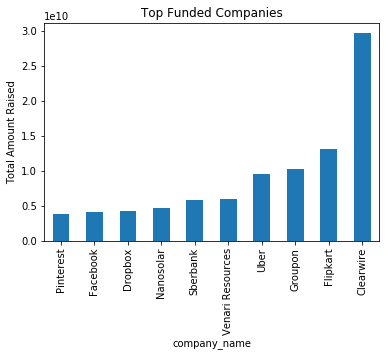

In [31]:
#Plot our data to find out which companies received the most investments:

plot_df = investments
plot_data = plot_df.groupby('company_name')['raised_amount_usd'].sum()
plot_data.sort_values()[-10:].plot(kind='bar')
plt.title("Top Funded Companies")
plt.ylabel("Total Amount Raised")

In [32]:
#Break it down to the top five companies and see the exact amounts raised:

topcompanies = df.groupby('company_name')[['raised_amount_usd']].sum()
topcompanies.sort_values('raised_amount_usd', ascending = False)[:5]

,raised_amount_usd
company_name,
Clearwire,29680000000
Flipkart,13081000000
Groupon,10185400000
Uber,9518150000
Venari Resources,5994061312


The top five companies that raised the most amount of money from investors included some familiar names, such as Uber and Groupon. The top spot was ultimately taken by Clearwire, a telecommunications operator. Although Clearwire ceased operations as of 2015, this suggests that established companies are able to secure more funding as many investment banks, hedge funds, and private equity firms are looking to make safer investments rather than take huge risks by funding unknown or smaller startups.

Text(0, 0.5, 'Total Amount Raised')

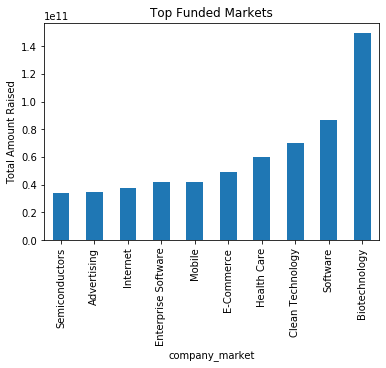

In [33]:
#Plot our data to see which markets received the most funding:

plot_df = investments
plot_data = plot_df.groupby('company_market')['raised_amount_usd'].sum()
plot_data.sort_values()[-10:].plot(kind='bar')
plt.title("Top Funded Markets")
plt.ylabel("Total Amount Raised")

In [34]:
#Break it down to the top five markets and see the exact amounts raised:

startupmarkets = df.groupby('company_market')['raised_amount_usd'].sum().reset_index()
startupmarkets.sort_values('raised_amount_usd', ascending = False)[:5]

,company_market,raised_amount_usd
55,Biotechnology,149395193589
601,Software,86701548892
89,Clean Technology,69819412081
289,Health Care,60050399849
191,E-Commerce,49505318436


Investors appear to be looking for the next great innovation in critical and promising industries according to the top markets data. Markets such as health care, biotechnology, and clean technology will continue to see investments as it serves an essential need. However, markets like software and e-commerce will continue to receive investments as investors are also eager to fund the next big startup that will amass millions of users.

Text(0, 0.5, 'Total Amount Raised')

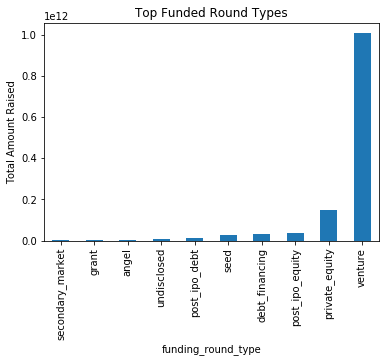

In [37]:
#Plot our data to find out which types of funding rounds raised the most money:

plot_df = investments
plot_data = plot_df.groupby('funding_round_type')['raised_amount_usd'].sum()
plot_data.sort_values()[-10:].plot(kind='bar')
plt.title("Top Funded Round Types")
plt.ylabel("Total Amount Raised")

In [36]:
#Break it down to the top five funding rounds and see the exact amounts raised:

fundingroundstype = df.groupby('funding_round_type')['raised_amount_usd'].sum().reset_index()
fundingroundstype.sort_values('raised_amount_usd', ascending = False)[:5]

,funding_round_type,raised_amount_usd
12,venture,1007869194565
7,private_equity,148640494900
6,post_ipo_equity,36949304604
2,debt_financing,31415966658
10,seed,25785093986


The top types of funding also suggest that investors are more willing to fund startups that have established some sort of track record, as venture capitalists and private equity firms are the types of investors who provided the most funds for these types of startups.

Text(0, 0.5, 'Total Amount Raised')

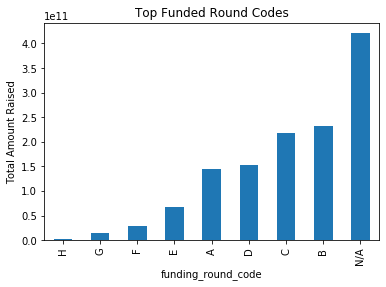

In [38]:
#Plot our data to find out which funding round codes raised the most money:

plot_df = investments
plot_data = plot_df.groupby('funding_round_code')['raised_amount_usd'].sum()
plot_data.sort_values()[-10:].plot(kind='bar')
plt.title("Top Funded Round Codes")
plt.ylabel("Total Amount Raised")

In [39]:
#Break it down to the top five funding round codes and see the exact amounts raised:

fundingroundscode = df.groupby('funding_round_code')['raised_amount_usd'].sum().reset_index()
fundingroundscode.sort_values('raised_amount_usd', ascending = False)[:5]

,funding_round_code,raised_amount_usd
8,N/A,421093300326
1,B,231168573275
2,C,216885109406
3,D,153529063606
0,A,145485794928


It is interesting to note that the top funding round codes did not specify any particular level of funding, indicating that it is the early rounds of pre-seed and seed investments that collectively made up the most amount raised. This aligns with the notion that the majority of startups usually only go through very early stages of investments while major banks and firms will generally only fund a startup that has progressed beyond the seed rounds.